In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.style.use('ggplot')

In [2]:
class CONFIG:

    NAMES_DTYPES = {
        "Source" : str,
        "Production" : np.float32
    }

current_directory = os.getcwd()
parent_folder_path = os.path.abspath(os.path.join(current_directory, "."))
data_folder_path = os.path.join(parent_folder_path, "data")
file_path = os.path.join(data_folder_path, "intermittent-renewables-production-france.csv")
data = pd.read_csv(
    file_path,
    index_col="Date and Hour",
    parse_dates=["Date and Hour", "Date"],
    dtype=CONFIG.NAMES_DTYPES
)
data.shape

(59806, 8)

In [3]:
data.head()

,Date,StartHour,EndHour,Source,Production,dayOfYear,dayName,monthName
Date and Hour,,,,,,,,
2020-07-22 20:00:00+02:00,2020-07-22,20:00:00,21:00:00,Solar,244.0,204,Wednesday,July
2020-07-23 07:00:00+02:00,2020-07-23,07:00:00,08:00:00,Solar,223.0,205,Thursday,July
2020-07-23 16:00:00+02:00,2020-07-23,16:00:00,17:00:00,Solar,2517.0,205,Thursday,July
2020-07-23 19:00:00+02:00,2020-07-23,19:00:00,20:00:00,Solar,658.0,205,Thursday,July
2020-07-23 23:00:00+02:00,2020-07-23,23:00:00,24:00:00,Solar,0.0,205,Thursday,July


In [11]:
print(data.dtypes)

Date          datetime64[ns]
StartHour             object
EndHour               object
Source                object
Production           float32
dayOfYear              int64
dayName               object
monthName             object
dtype: object


In [12]:
# Criando a coluna 'daily_production' com a soma da produção diária
daily_production = data.groupby(data['Date'])['Production'].sum().reset_index()
daily_production.rename(columns={'Production': 'daily_production'}, inplace=True)

In [13]:
# Realizando a regressão linear
X = daily_production.index.values.reshape(-1, 1)
y = daily_production['daily_production']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

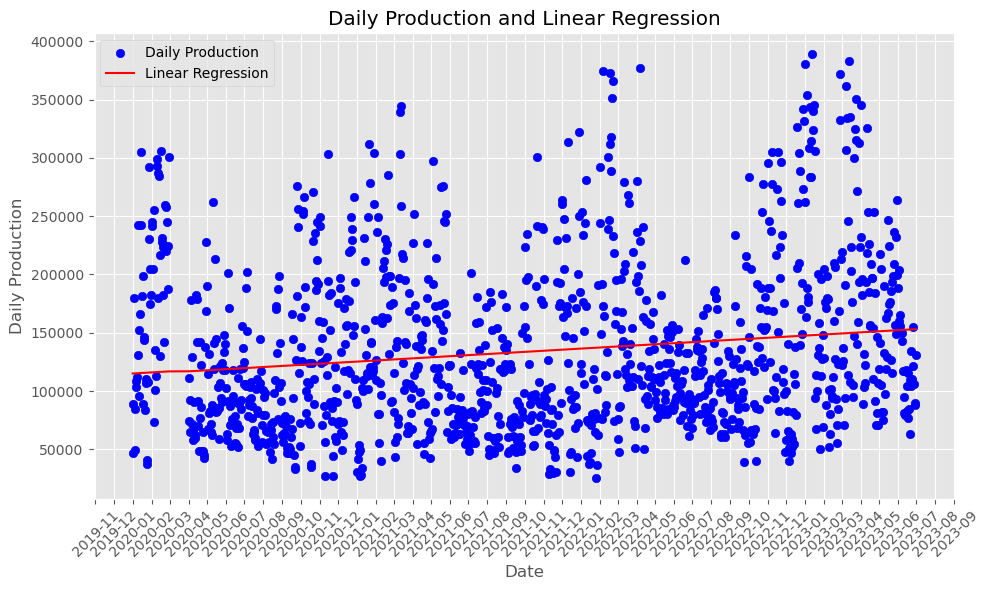

In [14]:
# Plotar os dados originais e a linha de regressão
plt.figure(figsize=(10, 6))
plt.scatter(daily_production['Date'], daily_production['daily_production'], label='Daily Production', color='b')
plt.plot(daily_production['Date'], y_pred, label='Linear Regression', color='r')
plt.xlabel('Date')
plt.ylabel('Daily Production')
plt.title('Daily Production and Linear Regression')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

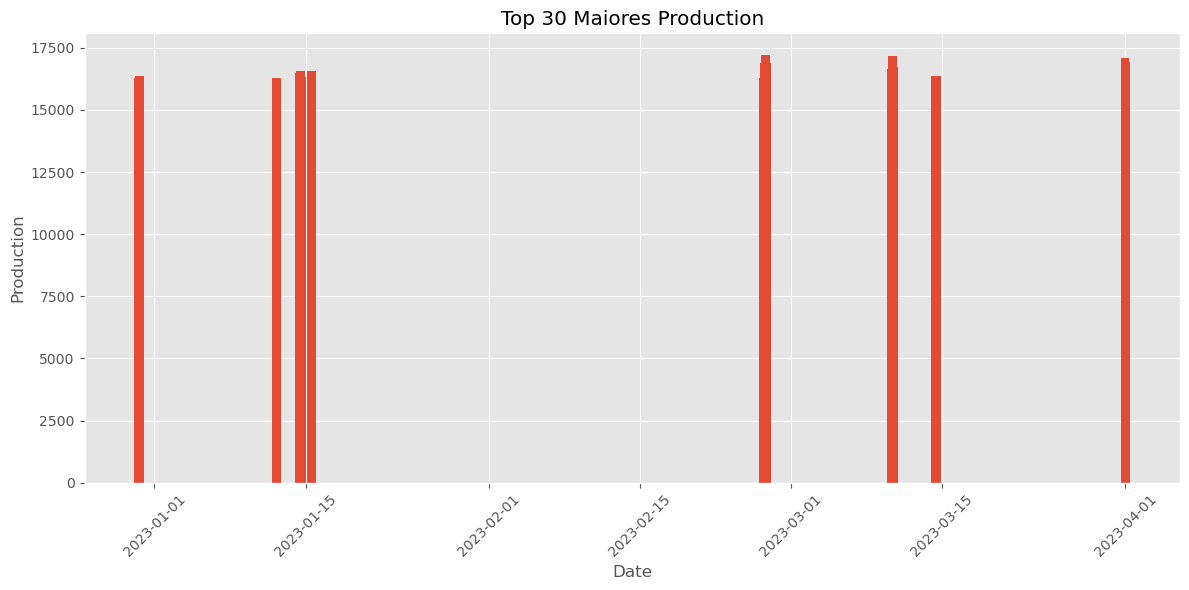

In [19]:
# Ordenar os dados pelo 'Production' em ordem decrescente e selecionar os top 30
top_30_largest = data.nlargest(30, 'Production')

# Plotar o gráfico de barras para visualizar os top 30 maiores
plt.figure(figsize=(12, 6))
plt.bar(top_30_largest.index, top_30_largest['Production'])
plt.xlabel('Date')
plt.ylabel('Production')
plt.title('Top 30 Maiores Production')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

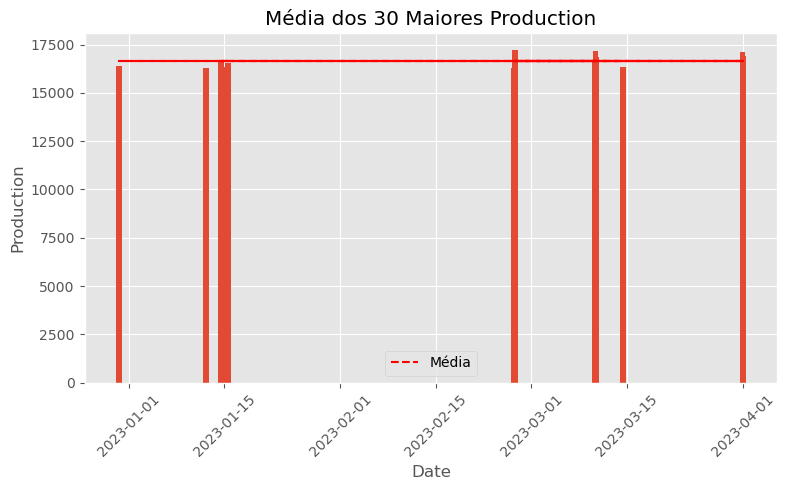

In [20]:
# Calcular a média dos 30 maiores
mean_top_30_largest = top_30_largest['Production'].mean()

# Plotar um gráfico de linha mostrando a média
plt.figure(figsize=(8, 5))
plt.plot(top_30_largest.index, [mean_top_30_largest] * len(top_30_largest), 'r--', label='Média')
plt.bar(top_30_largest.index, top_30_largest['Production'])
plt.xlabel('Date')
plt.ylabel('Production')
plt.title('Média dos 30 Maiores Production')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


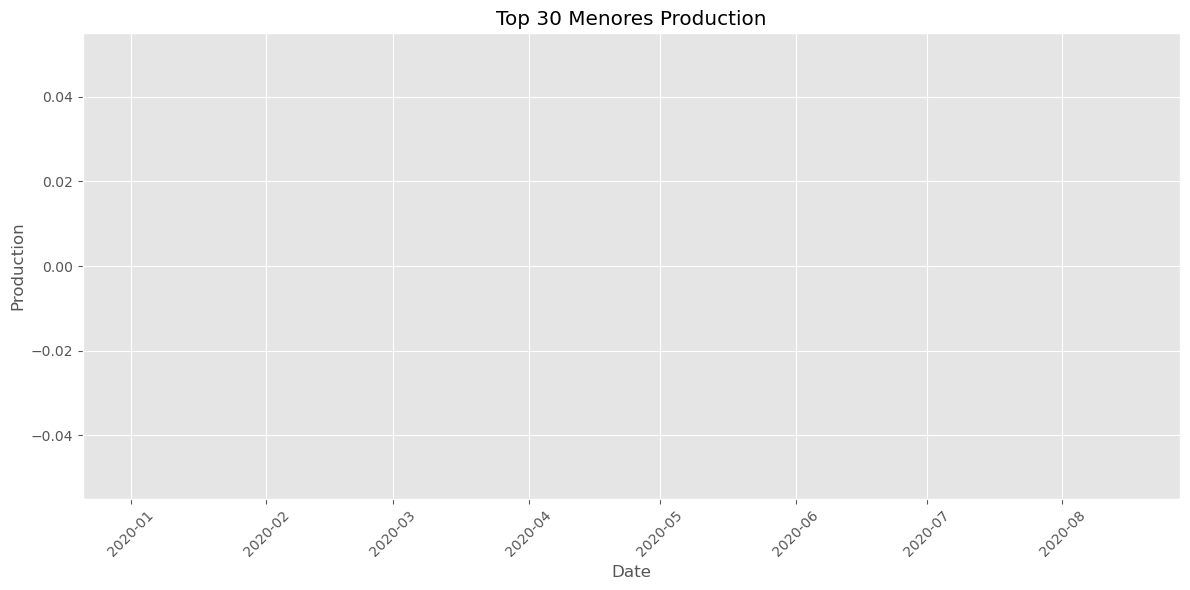

In [21]:
# Ordenar os dados pelo 'Production' em ordem crescente e selecionar os top 30
top_30_smallest = data.nsmallest(30, 'Production')

# Plotar o gráfico de barras para visualizar os top 30 menores
plt.figure(figsize=(12, 6))
plt.bar(top_30_smallest.index, top_30_smallest['Production'])
plt.xlabel('Date')
plt.ylabel('Production')
plt.title('Top 30 Menores Production')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

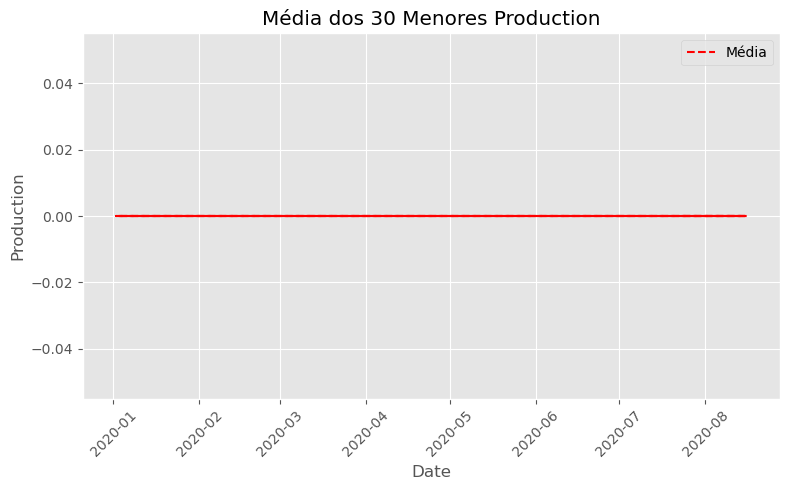

In [22]:
# Calcular a média dos 30 menores
mean_top_30_smallest = top_30_smallest['Production'].mean()

# Plotar um gráfico de linha mostrando a média
plt.figure(figsize=(8, 5))
plt.plot(top_30_smallest.index, [mean_top_30_smallest] * len(top_30_smallest), 'r--', label='Média')
plt.bar(top_30_smallest.index, top_30_smallest['Production'])
plt.xlabel('Date')
plt.ylabel('Production')
plt.title('Média dos 30 Menores Production')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

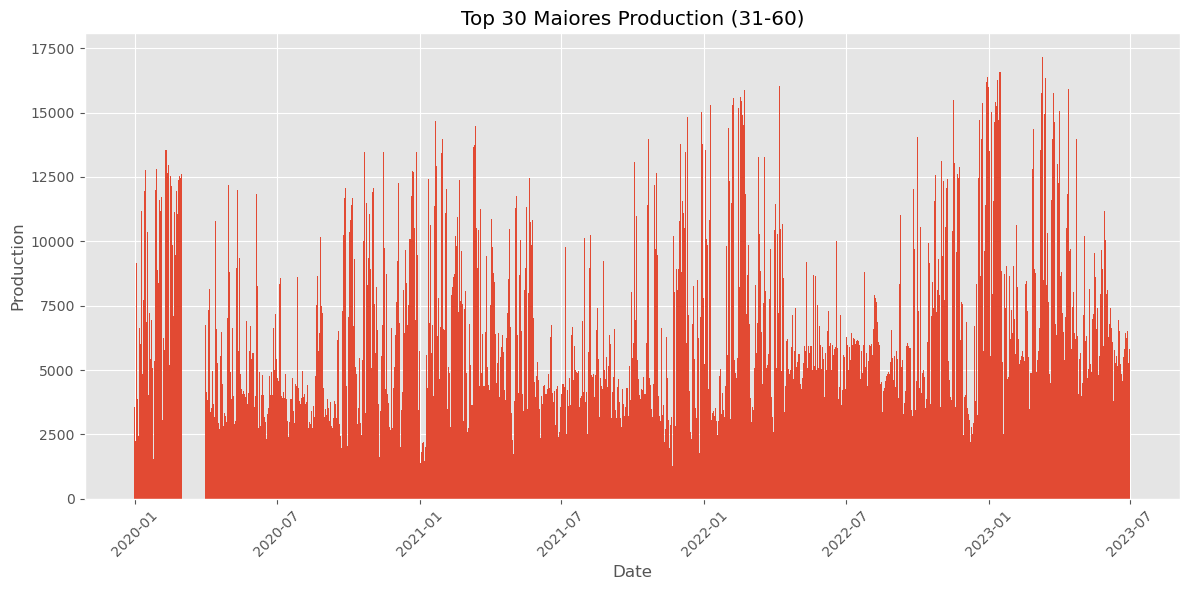

In [23]:
# Selecionar os dados excluindo os 30 maiores (do 1 ao 30)
excluded_top_30 = data.nsmallest(len(data) - 30, 'Production')

# Selecionar os 30 maiores na sequência (31-60)
top_30_next = data.nlargest(30, 'Production', keep='last')

# Concatenar os dois DataFrames
top_30_combined = pd.concat([excluded_top_30, top_30_next])

# Ordenar o DataFrame combinado pela data
top_30_combined = top_30_combined.sort_index()

# Plotar o gráfico de barras para visualizar os top 30 maiores na sequência (31-60)
plt.figure(figsize=(12, 6))
plt.bar(top_30_combined.index, top_30_combined['Production'])
plt.xlabel('Date')
plt.ylabel('Production')
plt.title('Top 30 Maiores Production (31-60)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()